<a href="https://colab.research.google.com/github/AMAN690/Inventoplus_XE_HACK_007/blob/master/CustomerSatisfactionPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data=pd.read_csv('Ecommerce Customers.csv')

In [4]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
data['Avatar'].value_counts(normalize=True)

SlateBlue        0.014
Cyan             0.014
Teal             0.014
GreenYellow      0.014
CadetBlue        0.014
                 ...  
PapayaWhip       0.002
PaleGoldenRod    0.002
DeepSkyBlue      0.002
PaleGreen        0.002
Red              0.002
Name: Avatar, Length: 138, dtype: float64

In [8]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


Analysis 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdc22868110>,
      dtype=object)

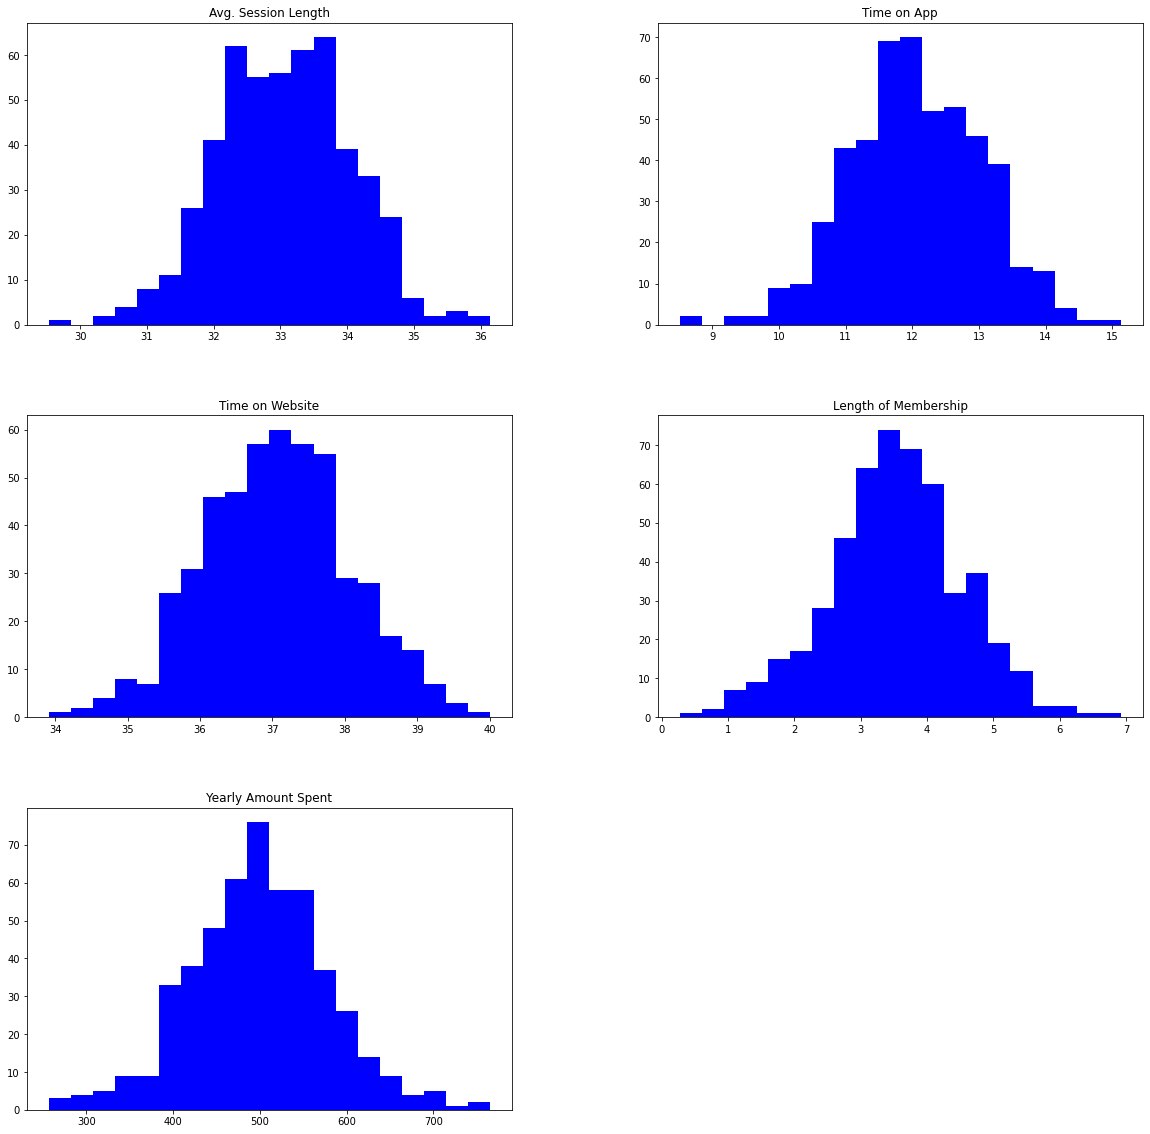

In [11]:
data.hist(bins=20,grid = False,figsize=(20,20),color='blue')

In [12]:
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr

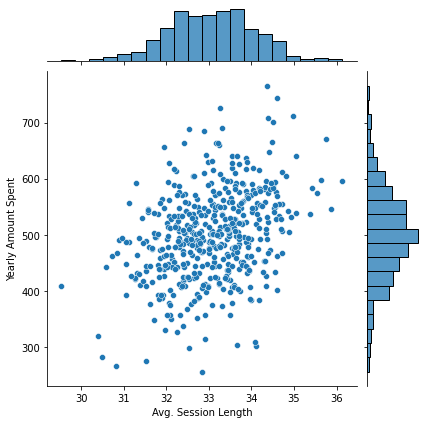

In [14]:
sns.jointplot(x='Avg. Session Length',y='Yearly Amount Spent',kind="scatter",data=data)

Correlation

In [15]:
data1 = data['Avg. Session Length']
data2 = data['Yearly Amount Spent']

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.2f' % corr)

Pearsons correlation: 0.36


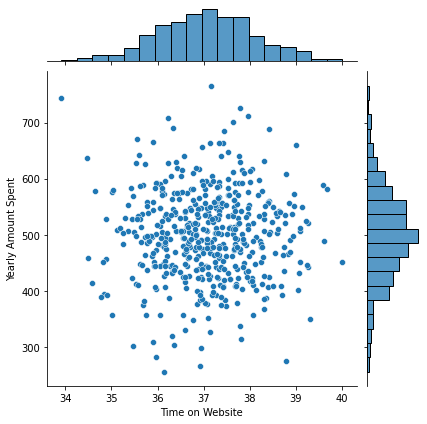

In [17]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',kind="scatter",data=data)

In [19]:
data1 = data['Time on Website']
data2 = data['Yearly Amount Spent']

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)
print("No correlation")

Pearsons correlation: -0.003
No correlation


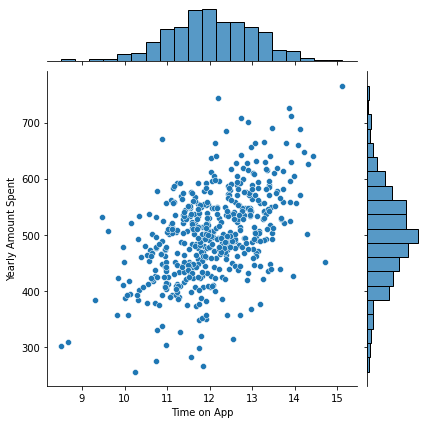

In [21]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',kind="scatter",data=data)

In [23]:
data1 = data['Time on App']
data2 = data['Yearly Amount Spent']

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.2f' % corr)
print("Strong correlation")

Pearsons correlation: 0.50
Strong correlation


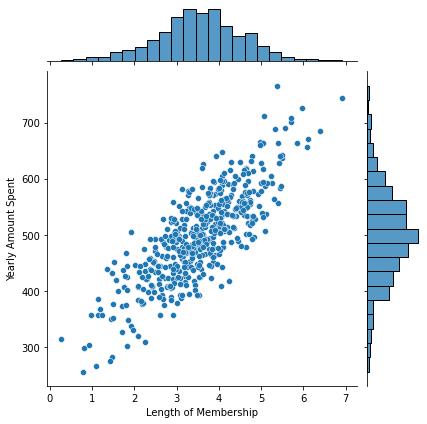

In [25]:
sns.jointplot(x='Length of Membership',y='Yearly Amount Spent',kind="scatter",data=data)

In [27]:
data1 = data['Length of Membership']
data2 = data['Yearly Amount Spent']

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.2f' % corr)
print("Strong correlation")

Pearsons correlation: 0.81
Strong correlation


summary

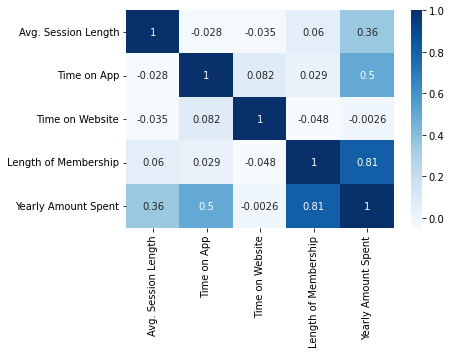

In [29]:
sns.heatmap(data.corr(),annot=True,cmap='Blues')

In [31]:
x=data.iloc[:,3:7].values
y=data.iloc[:,-1].values

In [32]:
data.sum()

Email                   mstephenson@fernandez.comhduke@hotmail.compall...
Address                 835 Frank Tunnel\nWrightmouth, MI 82180-960545...
Avatar                  VioletDarkGreenBisqueSaddleBrownMediumAquaMari...
Avg. Session Length                                               16526.6
Time on App                                                       6026.24
Time on Website                                                   18530.2
Length of Membership                                              1766.73
Yearly Amount Spent                                                249657
dtype: object

splitting dataset to training and testing

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

decisio tree


In [35]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [36]:
Y_pred=regressor.predict(x_test)

Linear regression

In [37]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
multiple_pred=linear.predict(x_test)


In [39]:
from sklearn.metrics import r2_score
r2_score(y_test,multiple_pred)

0.9849262667370623

In [40]:
from sklearn.metrics import r2_score
r2_score(y_test,Y_pred)

0.8508327242165744